#### Student informations (Max. 2 students) should be written in this cell (Student ID, Student Name).

Student 1:

Student 2: 

# HOMEWORK 2:   Gradient Descent, Stocahtic Gradient Descent, Data Normalization and Cross Validation for Regression Training and Testing

In Homework 1, we trained various Linear and Polynomial regression models by using direct and iterative optimization methods. However, testing was not included. In this homework you are assigned training and _testing_ various regression models, and building complete learning pipelines by implementing data normalization and cross-validation in your solutions. 

Your homework consists of a total of 5 problems. Please read this notebook carefully to ensure that you provide all the required solutions to the problems. (For your questions, please email: ergunesr@itu.edu.tr. Note: I will only guide you to the solutions and will not directly check your codes/answers or provide the answers.)

# 1.1 Training and Testing a Linear Regression Model with Gradient Descent and Data Normalization

In the following problem you are provided with a synthetic dataset consisting 500 samples and one feature dimension. You are expected to complete the **minMaxScaler** inside the **data_utils.py**, **GradientDescent** in **linearRegression.py** as instructed, train a linear regression model with the training split of your data, and make predictions. Please read carefully the cells in this notebook and make sure you implement and report every result required. 

Let's briefly recall **Linear Regression** from Homework 1:

Suppose we have $p$ input-output observation pairs that we want to regress: 

<div style="text-align:center">

${ \{ (\mathbf{x_1},y_1), (\mathbf{x_2},y_2), ... ,(\mathbf{x_P}, y_P) \} } $

</div> 

where $\mathbf{x_p}$ and $y_p$ denote the $p$th input and output respectively. In 2-dimensional space, where we have a scalar input and output, linear regression problem is a line fitting problem. As an example of a problem in which regression analysis may be
helpful, suppose input represents living areas and output represents prices of houses in Istanbul. Given this data, how can we learn to predict the prices of other houses in Istanbul, as a function of the size of their living areas? 

Generally, each input will be a column vector of length $N$, and we will denote this as $\mathbf{x_p}$. With input dimension $N$, linear regression problem is fitting a hyperplane to a scatter of points in $N+1$ dimensional space. 

In the case of scalar input, fitting a line to data requires determining a slope $w$ and bias (or $y$-intercept) $b$ so that we approaximate linear relationship holds between the input/output data:

<div style="text-align:center">

    $ b + x_p w \approx y_p $ 

</div> 

where             $p=1,...,P.$

When the input dimension is larger than 1, $N>1$, then we have a bias and $N$ associated weights.

<div style="text-align:center">

$\mathbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_{N}
\end{bmatrix}$

</div> 

Input variables (the elements of an input vector $\mathbf{x_p}$) are also called input features.  We will use $x_{i,p}$ to denote the input features so that an input vector is:

<div style="text-align:center">

$\mathbf{x} = \begin{bmatrix}
x_{1,p} \\
x_{2,p} \\
\vdots \\
x_{N,p}
\end{bmatrix}$

</div> 

The goal of linear regression is to estimate the bias and weights that minimize the sum of squared differences between the output values $y_p$ and the values predicted by the model $\hat{y}_p$.

We will use these notations for mathematical convenience;
 <div style="text-align:center">

$\mathbf{\widetilde{x}_p} = \begin{bmatrix}
1 \\
\mathbf{x_p} \\
\end{bmatrix}$  

 </div> 

<div style="text-align:center">

$\mathbf{\widetilde{w}} = \begin{bmatrix}
b \\
\mathbf{w} \\
\end{bmatrix}$  

</div> 

## Installation 
To start your homework, you need to install requirements. We recommend that you use conda environment for this homework. 

1. conda create -n ldhw2 python=3.8 numpy=1.23.5 matplotlib
2. conda activate ldhw2
3. conda install -c conda-forge notebook

In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import generate_data
# xData and yData constitutes your training set.

x_train, y_train, x_test, y_test = generate_data()

The **transform** and **inverse_transform** methods are part of the **MinMaxScaler** class, which is commonly used for feature scaling and normalization. Feature scaling is important in data preprocessing to ensure that features with larger values do not dominate the model training process. The transform method scales the input data to a desired range, while the **inverse_transform** method can be used to reverse this scaling operation. By implementing these methods in the data_utils.py file, we can ensure that the input data is properly scaled and balanced, which can improve the performance of the regressors.

In [27]:
from data_utils import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler(x_train)


# Transform x_train and x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Do the same for target variables
scaler_y = MinMaxScaler(y_train)


# Transform x_train and x_test
y_train_scaled = scaler_y.transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print(x_train.shape)
print(x_train_scaled.shape)

(400, 1)
(400, 1)


Now, you need to create two model objects to train one on unnormalized and the other on normalized data. Learning rate is set to 0.1. You only need to implement weight initialization search, and plot your cost curves. (One for each model.)

In [28]:
from linearRegression import gradientDescent
lr = 0.00001

###### TO DO: try different initializations and plot the cost curves, pick the best initialization accordingly.#####
####################################################################################################################
w = np.random.randn(x_train.shape[1]+1,1)
print(w.shape)
max_iterations = 100
model_unnormalized = gradientDescent(x_train, y_train, w, lr, max_iterations)
# train the model by calling fit() function
model_unnormalized.fit(lr, 100)

###### TO DO: try different initializations and plot the cost curves, pick the best initialization accordingly.#####
####################################################################################################################
lr = 0.8
# Constructing model to train on normalized data. 
model_normalized = gradientDescent(x_train_scaled, y_train_scaled, w, lr, max_iterations)
# train the model by calling fit() function
model_normalized.fit(lr, 400)

(2, 1)


(array([[0.13082396],
        [0.78480656]]),
 400)

After finding the best weight initialization for both models you please compare the training cost plots and testing error (RMSE) results of **model_unnormalized** and **model_normalized**.

You may use **predict()** method to get predicted results of **x_test**. After that, you need to use **inverse_transform** method of your **minMaxScaler** class. 

In [29]:
# Predict unnormalized test data
y_unnorm_predict = model_unnormalized.predict(x_test)

# Predict normalized test data
y_norm_predict = model_normalized.predict(x_test_scaled)

Now, you may run the following cell to plot the training data (in blue) and the predicted test values (in red).

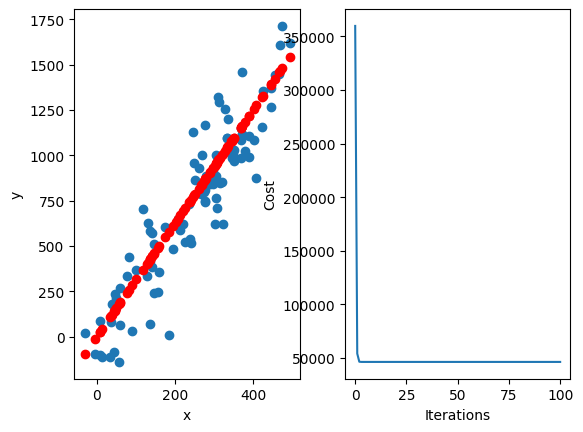

In [30]:
plt.subplot(1, 2, 1)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_unnorm_predict, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(model_unnormalized.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()

Before plotting the points for the normalized case, we need to transfer the normalized points to the original data space by calling **inverse_transform** method of the **minMaxScaler**.

In [31]:
y_norm_inv = scaler_y.inverse_transform(y_norm_predict)

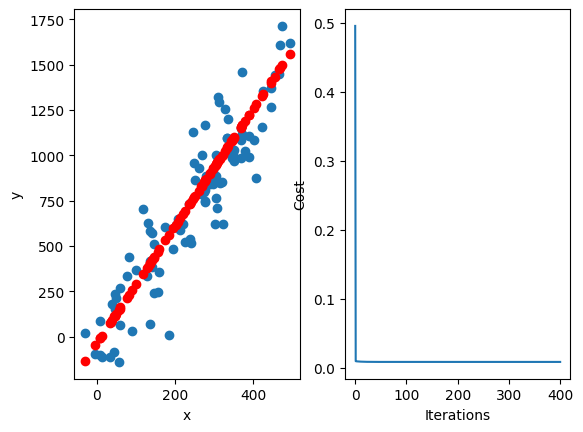

In [32]:
plt.subplot(1, 2, 1)
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_norm_inv, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.plot(model_normalized.cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')

plt.show()

Now, let's compare the **Root Mean Squared Errors** of both methods. 

In [33]:
rmse_unnorm = np.sqrt(np.sum(np.square(y_test - y_unnorm_predict)))/y_test.shape[0]

rmse_norm = np.sqrt(np.sum(np.square(y_test - y_norm_inv)))/y_test.shape[0]

print("RMSE for unnormalized training:", rmse_unnorm)
print("RMSE for normalized training:", rmse_norm)

RMSE for unnormalized training: 17.351190698720032
RMSE for normalized training: 17.215615671983738


Depending on the type of data you have, normalized training can show its benefits significantly in your model's prediction results. 

# 1.2 Linear Regression with Gradient Descent, Stochastic Gradient Descent, and Data Scaling

In the previous problem, you were assigned to find solutions to mean squared error linear regressor with gradient descent algorithm. In this question you are asked to implement **Stochastic Gradient Descent (SGD)**. SGD is a variant of gradient descent wherein we pick a sample $I_t$ uniformly at random in $\{1,...,p\}$ and update the weights as follows:

\begin{align*}
w_{i}^{t+1} &= w_{i}^{t} - \alpha \frac{\partial g(\mathbf{\widetilde{w}}^{t})}{\partial w_{i}^t} \text{ for all } i \\
b^{t+1} &= b^{t} - \alpha \frac{\partial g(\mathbf{\widetilde{w}}^t)}{\partial b^t}
\end{align*}

- $\mathbf{\widetilde{w}}^{t}$ represents the weight vector at time step $t$.
- $\alpha$ is the learning rate.
- $g(\mathbf{\widetilde{w}}^{t})$ is the loss function computed with $I_t$.
- $\frac{\delta g(\mathbf{\widetilde{w}}^{t})}{\delta \mathbf{\widetilde{w}}^{t}}$ denotes the gradient of the loss function with respect to the weights $\mathbf{\widetilde{w}}^{t}$.

### In this problem you are expected to implement SGD algorithm with Mean Squared Error cost and build a linear regression pipeline:

1) Implement **Stochastic Gradient Descent** algorithm for Mean Squared Error, complete the class **stochasticGradientDescent()** under **linearRegression.py**

2) Normalize your data with **minMaxScaler()**,

3) Construct two Linear Regression models by calling **GradientDescent()** and **stochasticGradientDescent()**,

4) Optimize the model parameters with Gradient Descent and Stochastic Gradient Descent. Implement hyperparameter search for weight initialization. Report your search results. Compare the performance of the models in terms of training cost convergence and testing RMSE.

5) Repeat 3 and 4 for the original **unnormalized** data, report your cost plots, and RMSEs.

You are required to report four final cost curves (except hyperparameter optimizations) and four RMSE scores, one for each case. Comment on your results in a cell below. You may use the same learning rate as problem 1.1 .

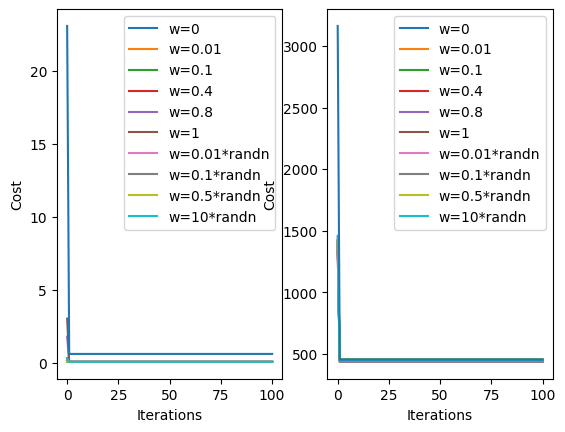

Normalized best cost:  0.04199948520043352 with weights column:  8
Unnormalized best cost:  433.8704254154858 with weights column:  5


In [73]:
##############################################################################
# TODO: Implement Stochastic Gradient Descent (SGD) algorithm in             #
# LinearRegression module. (For mean squared error cost)                     #
# Perform data scaling with MinMaxScaler                                     #
# Train the Linear Regression model with both Gradient Descent (with MSE     #
# and SGD                                                                    #
# Plot the training costs and test error.                                    #
# Repeat for the unnormalized data and compare the results.                  #
##############################################################################
import sys
np.random.seed(1005)
# print(x_train_scaled.shape)
weights = np.zeros((11, x_train.shape[1]+1,1))
weights[1,:,:] = 0.01*np.ones((x_train.shape[1]+1,1))
weights[2,:,:] = 0.1*np.ones((x_train.shape[1]+1,1))
weights[3,:,:] = 0.4*np.ones((x_train.shape[1]+1,1))
weights[4,:,:] = 0.8*np.ones((x_train.shape[1]+1,1))
weights[5,:,:] = np.ones((x_train.shape[1]+1,1))
weights[6,:,:]= np.random.randn(x_train.shape[1]+1,1)
weights[7,:,:] = 0.01*np.random.randn(x_train.shape[1]+1,1)
weights[8,:,:] = 0.1*np.random.randn(x_train.shape[1]+1,1)
weights[9,:,:] = 0.5*np.random.randn(x_train.shape[1]+1,1)
weights[10,:,:] = 10*np.random.randn(x_train.shape[1]+1,1)

list_of_weights = ["w=0", "w=0.01", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=0.01*randn", "w=0.1*randn", "w=0.5*randn", "w=10*randn"]

min_err_unnormalized = (sys.maxsize,-1)
min_err_normalized = (sys.maxsize,-1)
# print(min_err_unnormalized)
k = 0 # Counter for weight sets.

from linearRegression import SGD

# x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled
for w in weights:
    SGDModel1 = SGD(x_train_scaled, y_train_scaled, w, 0.01, 100)
    SGDModel1.fit(0.01, 100)

    min_err_normalized = min(min_err_normalized, (SGDModel1.cost_history[-1],k))
    plt.subplot(1, 2, 1)
    plt.plot(SGDModel1.cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend(["w=0", "w=0.01", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=0.01*randn", "w=0.1*randn", "w=0.5*randn", "w=10*randn"])
    
    SGDModel2 = SGD(x_train, y_train, w, 0.01, 100)
    SGDModel2.fit(0.01, 100)
    
    if(SGDModel2.cost_history[-1]  < float("inf") and SGDModel2.cost_history[-1] < min_err_unnormalized[0]):
        min_err_unnormalized = (SGDModel2.cost_history[-1],k)    
    
    plt.subplot(1, 2, 2)
    plt.plot(SGDModel2.cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend(list_of_weights)
    
    k += 1
        
    
plt.show()

print("Normalized best cost: ", min_err_normalized[0], "with weights column: ", min_err_normalized[1])
print("Unnormalized best cost: ", min_err_unnormalized[0], "with weights column: ", min_err_unnormalized[1])

if(float("inf") < SGDModel2.cost_history[-1]):
    print("SGDModel2 cost history is inf")


##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 1.3 Polynomial Regression with Gradient Descent and Stochastic Gradient Descent

You have been provided with a dataset (Q1_3.py) consisting of two dimension as features and one dimension for regression.  After generating the corresponding Vandermonde matrix for the problem, you are expected to train a $2$nd order polynomial model on the training data, and later test your models. Specifically, the assignment is to complete the following tasks:

1) By using the unnormalized data, train a polynomial regression model to find optimal weights $\mathbf{\widetilde{w}}^{*}$ by using Gradient Descent and Stochastic Gradient Descent. Explore how the choice of weight initializations in gradient descent and stochastic gradient descent affects the convergence and final weights. You may change the search space provided to you as you want. Test your model on the tesing data and report RMSE. 

2) Print and compare the weight vectors obtained by gradient descent and stochastic gradient descent. How close are the values in each dimension?

3) Normalize your data, repeat step 1 and 2. Compare the training cost curves and testing RMSE errors.

**Recall:**

Polynomial regression is an extension of linear regression designed to model more complex relationships between input features and the target variable. While linear regression assumes a straight-line relationship, polynomial regression introduces higher-degree terms to capture nonlinear patterns. Polynomials are widely used in situations where the response is curvilinear.

Suppose we have $P$ scalar input-output observation pairs:

<div style="text-align:center">

${ \{ (x_1,y_1), (x_1,y_2), ... ,(x_P, y_P) \} } $

</div>

The following model is a $d$-th order polynomial in one variable:

<div style="text-align:center">

$ y_p = b + w_1 x_1 + w_2 {x_p}^{2} + w_3 {x_p}^3 + ... + w_d {x_p}^d$

</div>

Similar to linear regression, one can fit the observation set to a polynomial model by using direct optimization with least squares method. Different from linear regression, one needs to create a special design matrix named Vandermonde matrix, $V$, for storing input values according to the polynomial expression. When $x_p$ is a scalar, we can construct $\mathbf{V}$ as follows:

<div style="text-align:center">

$ \mathbf{V} = \begin{bmatrix}
1 & x_1 & x_1^2 & \ldots & x_1^{d} \\
1 & x_2 & x_2^2 & \ldots & x_2^{d} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_P & x_P^2 & \ldots & x_P^{d}
\end{bmatrix} $

</div>

Suppose input is a 2 dimensional vector with independent features:

<div style="text-align:center">

$\mathbf{{x}_p} = \begin{bmatrix}
x_{1,p} \\
x_{2,p} \\
\end{bmatrix}$  

</div>

Then, the corresponding Vandermonde matrix is (for a degree $d$ polynomial model):

<div style="text-align:center">

$ \mathbf{V} = \begin{bmatrix}
1 & x_{1,1} & x_{2,1} & x_{1,1}^2 & x_{2,1}^2  & \ldots & x_{1,1}^{d} & x_{2,1}^{d} \\
1 & x_{1,2} & x_{2,2} & x_{1,2}^2  & x_{2,2}^2  & \ldots & x_{1,2}^{d} & x_{2,2}^{d} \\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots  & \vdots  \\
1 & x_{1,P} & x_{2,P} & x_{1,P}^2 & x_{2,P}^2  & \ldots & x_{1,P}^{d} & x_{2,P}^{d} \\
\end{bmatrix} $

</div>

**In this question, you may set learning rate to 0.009.**

In [93]:
import numpy as np

with open('Q1_3.npy', 'rb') as f:
    x_train = np.load(f)
    x_test = np.load(f)
    y_train = np.load(f)
    y_test = np.load(f)
    
scaler = MinMaxScaler(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler_y = MinMaxScaler(y_train)
y_train_scaled = scaler_y.transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

2
Y shape:  (2100, 1)


c:\Users\yousu\Masaüstü\IVIRZIVIR\itubahar2024\blg4542-lfd\HW2_LFD\polynomialRegression.py:204: RuntimeWarning: overflow encountered in matmul
  gradient = (x_slice.T @ (x_slice @ self.w - self.y[i]))
c:\Users\yousu\Masaüstü\IVIRZIVIR\itubahar2024\blg4542-lfd\HW2_LFD\polynomialRegression.py:254: RuntimeWarning: invalid value encountered in subtract
  self.w = self.w - self.lr * gradient
c:\Users\yousu\Masaüstü\IVIRZIVIR\itubahar2024\blg4542-lfd\HW2_LFD\polynomialRegression.py:204: RuntimeWarning: invalid value encountered in matmul
  gradient = (x_slice.T @ (x_slice @ self.w - self.y[i]))


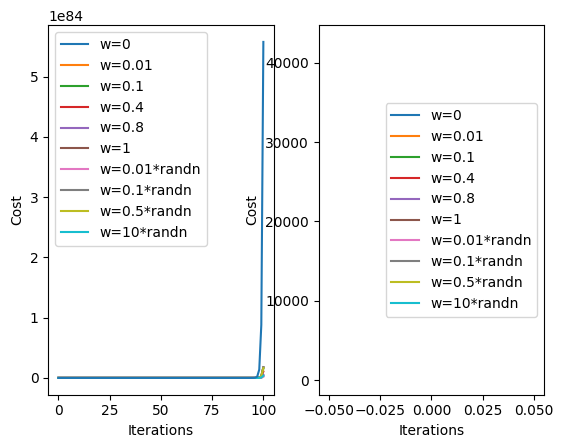

Unnormalized best cost for GD:  9223372036854775807 with weights column:  -1
Unnormalized best cost for SGD:  9223372036854775807 with weights column:  -1


In [94]:
##############################################################################
# TODO: Do all your unnormalized trainings with Gradient Descent and         #
# Stochastic Gradient Descent here.                                          #
# Plot all training cost history for different different                     #
# initial weights.                                                           #
# Test your models trained with GD and SGD by regressing on the test data.   #
# Report the test performance in terms of RMSE.                              #
##############################################################################
from polynomialRegression import gradientDescent, SGD

np.random.seed(1005)
degree = 2

# print(x_train_scaled.shape)
weights = np.zeros((11, degree+1,1))
weights[1,:,:] = 0.01*np.ones((degree+1,1))
weights[2,:,:] = 0.1*np.ones((degree+1,1))
weights[3,:,:] = 0.4*np.ones((degree+1,1))
weights[4,:,:] = 0.8*np.ones((degree+1,1))
weights[5,:,:] = np.ones((degree+1,1))
weights[6,:,:]= np.random.randn(degree+1,1)
weights[7,:,:] = 0.01*np.random.randn(degree+1,1)
weights[8,:,:] = 0.1*np.random.randn(degree+1,1)
weights[9,:,:] = 0.5*np.random.randn(degree+1,1)
weights[10,:,:] = 10*np.random.randn(degree+1,1)

list_of_weights = ["w=0", "w=0.01", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=0.01*randn", "w=0.1*randn", "w=0.5*randn", "w=10*randn"]

# check for diminishing learning rate is it 1 / (k + 1) or (1 / k) + 1 

learning_rate = 0.009
feat_dim = x_train.shape[1]
print(feat_dim)
print("Y shape: ", y_train.shape)
min_err_unnormalized_gd = (sys.maxsize,-1)
min_err_unnormalized_sgd = (sys.maxsize,-1)

k = 0

for w in weights:
    model_unnormalized = gradientDescent(x_train, y_train, w, learning_rate, max_iterations, degree=degree, feat_dim=feat_dim)
    model_unnormalized.fit(learning_rate, 100)
    min_err_unnormalized_gd = min(min_err_unnormalized_gd, (model_unnormalized.cost_history[-1],k))
    plt.subplot(1, 2, 1)
    plt.plot(model_unnormalized.cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend(list_of_weights)
    
    model_unnormalized_SGD = SGD(x_train, y_train, w, learning_rate, max_iterations, degree=degree, feat_dim=feat_dim)
    model_unnormalized_SGD.fit(learning_rate, 100)
    min_err_unnormalized_sgd = min(min_err_unnormalized_sgd, (model_unnormalized_SGD.cost_history[-1],k))
    plt.subplot(1, 2, 2)
    plt.plot(model_unnormalized_SGD.cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend(list_of_weights)
    
    k += 1
    
plt.show()

print("Unnormalized best cost for GD: ", min_err_unnormalized_gd[0], "with weights column: ", min_err_unnormalized_gd[1])
print("Unnormalized best cost for SGD: ", min_err_unnormalized_sgd[0], "with weights column: ", min_err_unnormalized_sgd[1])

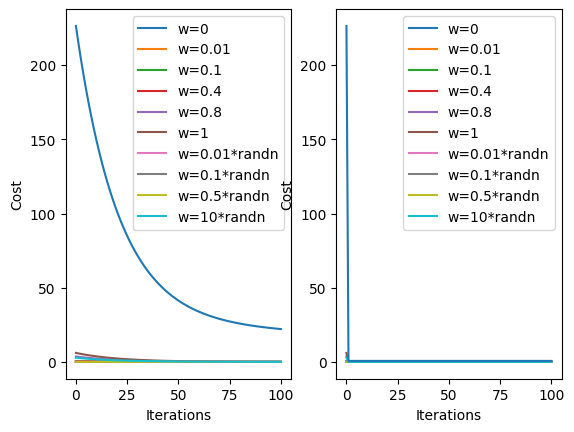

Normalized best cost for GD:  0.03037748715299091 with weights column:  6
Normalized best cost for SGD:  0.04960412497773803 with weights column:  1


In [95]:
##############################################################################
# TODO: Do all your normalized trainings with Gradient Descent and           #
# Stochastic Gradient Descent here.                                          #
# Plot all training cost history for different different                     #
# initial weights.                                                           #
# Test your models trained with GD and SGD by regressing on the test data.   #
# Report the test performance in terms of RMSE.                              #
# Compare the normalized and unnormalized training and testing results.      #
##############################################################################
np.random.seed(1071)
degree = 2

# print(x_train_scaled.shape)
weights = np.zeros((11, degree+1,1))
weights[1,:,:] = 0.01*np.ones((degree+1,1))
weights[2,:,:] = 0.1*np.ones((degree+1,1))
weights[3,:,:] = 0.4*np.ones((degree+1,1))
weights[4,:,:] = 0.8*np.ones((degree+1,1))
weights[5,:,:] = np.ones((degree+1,1))
weights[6,:,:]= np.random.randn(degree+1,1)
weights[7,:,:] = 0.01*np.random.randn(degree+1,1)
weights[8,:,:] = 0.1*np.random.randn(degree+1,1)
weights[9,:,:] = 0.5*np.random.randn(degree+1,1)
weights[10,:,:] = 10*np.random.randn(degree+1,1)

list_of_weights = ["w=0", "w=0.01", "w=0.1", "w=0.4", "w=0.8", "w=1", "w=0.01*randn", "w=0.1*randn", "w=0.5*randn", "w=10*randn"]
learning_rate = 0.009

min_err_normalized_gd = (sys.maxsize,-1)
min_err_normalized_sgd = (sys.maxsize,-1)

k = 0

for w in weights:
    model_normalized = gradientDescent(x_train_scaled, y_train_scaled, w, learning_rate, max_iterations, degree=degree, feat_dim=feat_dim)
    model_normalized.fit(learning_rate, 100)
    min_err_normalized_gd = min(min_err_normalized_gd, (model_normalized.cost_history[-1],k))
    plt.subplot(1, 2, 1)
    plt.plot(model_normalized.cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend(list_of_weights)
    
    model_normalized_SGD = SGD(x_train_scaled, y_train_scaled, w, learning_rate, max_iterations, degree=degree, feat_dim=feat_dim)
    model_normalized_SGD.fit(learning_rate, 100)
    min_err_normalized_sgd = min(min_err_normalized_sgd, (model_normalized_SGD.cost_history[-1],k))
    plt.subplot(1, 2, 2)
    plt.plot(model_normalized_SGD.cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.legend(list_of_weights)
    
    k += 1
    
plt.show()

print("Normalized best cost for GD: ", min_err_normalized_gd[0], "with weights column: ", min_err_normalized_gd[1])
print("Normalized best cost for SGD: ", min_err_normalized_sgd[0], "with weights column: ", min_err_normalized_sgd[1])

## 2.1 CROSS-VALIDATION and Feature Selection for Linear Regression

In most of the real world datasets, training error do not reflect the actual test error. A widely-used practical method of obtaining a good estimate of the error rate of a learning
algorithm is **k-fold cross-validation** (Cross-Validation: CV). CV partitions the dataset into k equal-sized folds.
Each fold acts as a test set for evaluating the model being learned on the other k − 1 folds. The average
error across the k hypotheses is used as an estimate of the error rate. The final performance metric is typically the average of the performance metrics obtained in each iteration. Cross-validation provides a robust estimate of a model's performance and guards against overfitting. 

In this question you are expected to implement **cross-validate()** of the **gradientDescent()** class, under **LinearRegression** module. This method needs to implement 5 Fold cross-validation on the training set and return to average mean squared error on the validation sets using gradient descent training with mean squared cost. After that, you are expected to run the following cells and select the two features yielding the best estimate. Plot the cross validation performance of each combination. You need to check 6 scenarios, since $C(4,2) = 6$. After determining the two features, train a linear regression model on your entire training set using gradient descent, and test it on the test data. Plot the cost, and report the testing RMSE of your trained model.

**You may set learning rate to 0.5 .**

You may start by loading the data.

In [114]:
import numpy as np

with open('Q2_1.npy', 'rb') as f:
    x_train = np.load(f)
    x_test = np.load(f)
    y_train = np.load(f)
    y_test = np.load(f)

Normalize the data in the following cell. 

In [115]:
from data_utils import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler(x_train)


# Transform x_train and x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Do the same for target variables
scaler_y = MinMaxScaler(y_train)


# Transform x_train and x_test
y_train_scaled = scaler_y.transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print(x_train.shape)
print(y_train.shape)

(2100, 4)
(2100,)


You may do the rest of the tasks here.

In [132]:
##############################################################################
# TODO: Implement cross-validation under the LinearRegression.py as          #
# as instructed. (Using GD, 5-Fold., Implement hyperparameter search inside) #
# Implement feature selection using cross-validation. Pick the two feature   #
# dimensions yielding the best validation performance.                       #
# Using these dimensions, train a linear regression model with GD and        #
# Plot all training cost history for different different                     #
# initial weights.                                                           #
# Report the test performance in terms of RMSE.                              #
##############################################################################
from linearRegression import gradientDescent

# Create your training input matrix. Modify the following code as you wish if necessary.
x = x_train_scaled
y = y_train_scaled
n_features = x.shape[1]
print(n_features)
w= np.random.randn(3,1) # 3, 1 ???
print(w.shape)

lr = 0.5
max_iterations = 100
# Perform cross-validation for all combinations of two features
for i in range(n_features):
    for j in range(i + 1, n_features):
        # Select two features based on indices i and j
        selected_features = x[:, [i, j]]

        model = gradientDescent(selected_features, y, w, lr, max_iterations)
        # Perform 5-fold cross-validation. "model" refers to your gradientDescent object. 
        cross_val_error = model.cross_validate(k=5)

        # Print indices and cross-validation results
        print("Indices:", i, j)
        print("Cross-Validation Error:", cross_val_error)
        print()

4
(3, 1)
Indices: 0 1
Cross-Validation Error: 0.907204842831422

Indices: 0 2
Cross-Validation Error: 0.8952579180815992

Indices: 0 3
Cross-Validation Error: 0.8921586327126754

Indices: 1 2
Cross-Validation Error: 0.9137044663050056

Indices: 1 3
Cross-Validation Error: 0.9119409416868329

Indices: 2 3
Cross-Validation Error: 0.9026014522080743



## 2.2 CROSS-VALIDATION and Feature Selection for Linear Regression (by Stochastic Gradient Descent)

In this question you are expected to implement **cross-validate()** of the **SGD()** class, under **linearRegression.py** module. This method needs to implement 5 Fold cross-validation on the training set and return to average mean squared error on the validation sets using stochastic gradient descent training with mean squared cost. Normalize your data, create the corresponding linear regression input matrices and implement feature selection procedure as before. Plot the cross validation performance of each combination. You need to check 6 scenarios, since $C(4,2) = 6$. After determining the two features, train a linear regression model on your entire training set using gradient descent, and test it on the test data. Plot the cost, and report the testing RMSE of your trained model.

In [133]:
##############################################################################
# TODO: Implement cross-validation under the LinearRegression.py as          #
# as instructed. (Using GD, 5-Fold., Implement hyperparameter search inside) #
# Implement feature selection using cross-validation. Pick the two feature   #
# dimensions yielding the best validation performance.                       #
# Using only these dimensions, train a linear regression model with GD and   #
# Plot all training cost history for different different                     #
# initial weights.                                                           #
# Report the test performance in terms of RMSE.                              #
##############################################################################
from linearRegression import SGD
x = x_train_scaled
y = y_train_scaled

# Perform cross-validation for all combinations of two features
for i in range(n_features):
    for j in range(i + 1, n_features):
        # Select two features based on indices i and j
        selected_features = x[:, [i, j]]

        model = SGD(selected_features, y, w, lr, max_iterations)
        # Perform 5-fold cross-validation. "model" refers to your gradientDescent object. 
        cross_val_error = model.cross_validate(k=5)

        # Print indices and cross-validation results
        print("Indices:", i, j)
        print("Cross-Validation Error:", cross_val_error)
        print()

Indices: 0 1
Cross-Validation Error: 0.9066151261717492

Indices: 0 2
Cross-Validation Error: 0.9327762742998502

Indices: 0 3
Cross-Validation Error: 0.9196518993664821

Indices: 1 2
Cross-Validation Error: 0.9248069234000891

Indices: 1 3
Cross-Validation Error: 0.9244657540702409

Indices: 2 3
Cross-Validation Error: 0.9342970607128105



### Compare the results of Question 2.1 and 2.2 and comment on them. 